In [1]:
#Importing necessary libraries
import pandas as pd
import pandas_profiling
from sqlalchemy import create_engine
import sqlalchemy as db
import pymysql
df = pd.read_csv(r"C:\Siddhesh Data\Study\Career Planning\Job Applications\Stripe\TakeHomeAssignment\takehome_ds_written - Copy.csv")

In [2]:
#Getting sense on the data & removing the unnecessary columns
df.head()
df_merchant = df.drop(['Unnamed: 0'], axis=1)
# Adding additional column - Casting cents value into dollars
df_merchant["amount_usd_in_dollars"]=df_merchant.loc[:,"amount_usd_in_cents"] / 100
df_merchant


,merchant,time,amount_usd_in_cents,amount_usd_in_dollars
0,faa029c6b0,2034-06-17 23:34:14,6349,63.49
1,ed7a7d91aa,2034-12-27 00:40:38,3854,38.54
2,5608f200cf,2034-04-30 01:29:42,789,7.89
3,15b1a0d61e,2034-09-16 01:06:23,4452,44.52
4,4770051790,2034-07-22 16:21:42,20203,202.03
...,...,...,...,...
1513714,72d37bedbf,2034-06-21 13:47:51,5274,52.74
1513715,5608f200cf,2034-04-20 02:23:59,754,7.54
1513716,fcbd1dae68,2033-09-19 14:02:33,13203,132.03
1513717,9843e52410,2034-12-28 20:07:59,4845,48.45


In [ ]:
#pandas profiling can be used for Exploratory data analysis
df_merchant.describe()
df_merchant.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [3]:
#Connecting to MySQL
import pymysql
user = 'root'
passw = 'root'
host =  '127.0.0.1'
port = 3306
database = 'sakila'

#Opening Connection 
conn = pymysql.connect(host=host,
                       port=port,
                       user=user, 
                       passwd=passw,  
                       db=database,
                       charset='utf8')

# Reading sample data from MYSQL

cur = conn.cursor()
cur.execute("select * from merchant_transactions limit 3")
output = cur.fetchall()
for i in output:
    print(i)


('faa029c6b0', '2034-06-17 23:34:14', 6349)
('ed7a7d91aa', '2034-12-27 00:40:38', 3854)
('5608f200cf', '2034-04-30 01:29:42', 789)


In [4]:
# Credentials to database connection for writing dataframe to mySQL. MySQL connection had network issue, 
#hence I had to create dataframe first and then write it to MySQL
hostname="127.0.0.1"
dbname="sakila"
uname="root"
pwd="root"

# Create SQLAlchemy engine to connect to MySQL Database
engine = create_engine("mysql+pymysql://{user}:{pw}@{host}/{db}".format(host=hostname, db=dbname, user=uname, pw=pwd))

# Convert dataframe to sql table                                   
#df.to_sql('merchant_transactions', engine, index=False) # This is done, hence commented

In [5]:
# Another way to read data
connection = engine.connect()
metadata = db.MetaData()
table_in_consideration = db.Table('merchant_transactions', metadata, autoload=True, autoload_with=engine)
query = db.select([table_in_consideration])
ResultProxy = connection.execute(query)
ResultSet = ResultProxy.fetchall()
ResultSet[:3]

query2 = db.select([table_in_consideration]).where(table_in_consideration.columns.amount_usd_in_cents >= 11000)
result2 = connection.execute(query2).scalar()
print(result2)

4770051790


In [4]:
# Since, our MYSQL connection is not getting interrupted, let's do analysis via Pandas only
df_merchant.head()

,merchant,time,amount_usd_in_cents,amount_usd_in_dollars
0,faa029c6b0,2034-06-17 23:34:14,6349,63.49
1,ed7a7d91aa,2034-12-27 00:40:38,3854,38.54
2,5608f200cf,2034-04-30 01:29:42,789,7.89
3,15b1a0d61e,2034-09-16 01:06:23,4452,44.52
4,4770051790,2034-07-22 16:21:42,20203,202.03


In [5]:
df_merchant.loc[:,"amount_usd_in_cents"]
df_merchant.iloc[:,2]

0           6349
1           3854
2            789
3           4452
4          20203
           ...  
1513714     5274
1513715      754
1513716    13203
1513717     4845
1513718     3862
Name: amount_usd_in_cents, Length: 1513719, dtype: int64

In [105]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [6]:
# Display data
type(df_merchant["amount_usd_in_dollars"] >= 120) #This would display series
type(df_merchant[df_merchant["amount_usd_in_dollars"] >= 120]) # This would display Dataframe
df_merchant[df_merchant["amount_usd_in_dollars"] >= 120]

,merchant,time,amount_usd_in_cents,amount_usd_in_dollars
4,4770051790,2034-07-22 16:21:42,20203,202.03
8,9cb79b7700,2034-03-27 23:01:13,23267,232.67
18,207cc1c4a7,2034-04-22 19:56:35,44967,449.67
22,fb6a7c1709,2034-01-11 02:58:37,12862,128.62
23,aff06c8624,2034-03-29 03:27:58,66160,661.60
...,...,...,...,...
1513701,1ad2dd20c2,2034-03-03 18:15:49,22937,229.37
1513706,71a3c03fc8,2034-12-11 16:57:09,37990,379.90
1513711,0d970b6c59,2034-08-29 15:25:57,24772,247.72
1513712,2ee2608106,2034-03-11 03:08:28,59264,592.64


In [7]:
# Let's understand amount_usd_in_dollars in detail
print("Max value is", df_merchant["amount_usd_in_dollars"].max(),"\nMin value is", df_merchant["amount_usd_in_dollars"].min(),"\nStd is",df_merchant["amount_usd_in_dollars"].std(),"\nMean is",df_merchant["amount_usd_in_dollars"].mean())

Max value is 259202.8 
Min value is 2.01 
Std is 616.1886376348684 
Mean is 154.84660826744977


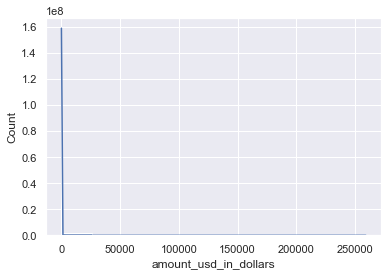

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.histplot(data=df_merchant, x="amount_usd_in_dollars",bins=10,kde=True)
plt.show()
#sns.lineplot(data=df_merchant)
#df_merchant.plot()
#df_merchant.loc[:,"amount_usd_in_dollars"].plot(kind="bar")

In [9]:
#Getting overall transaction done by merchant & separate analysis based on the amount spent
df_merchant_amount = df_merchant.groupby(by=["merchant"]).sum("amount_usd_in_dollars")
df_merchant_amount.drop("amount_usd_in_cents",axis=1,inplace=True)
df_merchant_amount.head()


,amount_usd_in_dollars
merchant,
0002b63b92,33.79
0002d07bba,892.78
00057d4302,295.21
000bcff341,78.26
000ddbf0ca,102.99


<AxesSubplot:xlabel='amount_usd_in_dollars'>

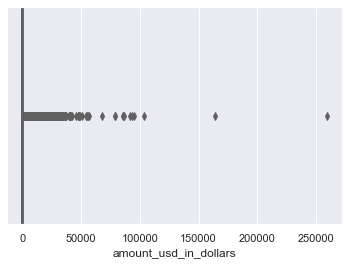

In [10]:
#PLotting box plot to get sense on the ranges 
sns.boxplot(x="amount_usd_in_dollars",data=df_merchant,palette="Blues",width=50.4)

In [11]:
# create a list of our conditions to categorize merchant type
import numpy as np
conditions = [
    (df_merchant_amount['amount_usd_in_dollars'] <= 45000), #LR
    (df_merchant_amount['amount_usd_in_dollars'] > 45001) & (df_merchant_amount['amount_usd_in_dollars'] <= 60000), #MR
    (df_merchant_amount['amount_usd_in_dollars'] > 60001) & (df_merchant_amount['amount_usd_in_dollars'] <= 70000), #HR
    (df_merchant_amount['amount_usd_in_dollars'] > 70001) & (df_merchant_amount['amount_usd_in_dollars'] <= 100000), #ER
    (df_merchant_amount['amount_usd_in_dollars'] > 100001) & (df_merchant_amount['amount_usd_in_dollars'] <= 150000), #LW
    (df_merchant_amount['amount_usd_in_dollars'] > 150001) & (df_merchant_amount['amount_usd_in_dollars'] <= 200000), #MW
    (df_merchant_amount['amount_usd_in_dollars'] > 200001) #HW
    ]

# create a list of the values we want to assign for each condition
values = ['Low Retail', 'Medium Retail', 'High Retail', 'Extreme Retail','Low Wholesale','Medium Wholesale','High Wholesale']

# create a new column and use np.select to assign values to it using our lists as arguments
df_merchant_amount['Merchant Type'] = np.select(conditions, values)

# display updated DataFrame
df_merchant_amount.head()

,amount_usd_in_dollars,Merchant Type
merchant,,
0002b63b92,33.79,Low Retail
0002d07bba,892.78,Low Retail
00057d4302,295.21,Low Retail
000bcff341,78.26,Low Retail
000ddbf0ca,102.99,Low Retail


<AxesSubplot:xlabel='Merchant Type', ylabel='Count'>

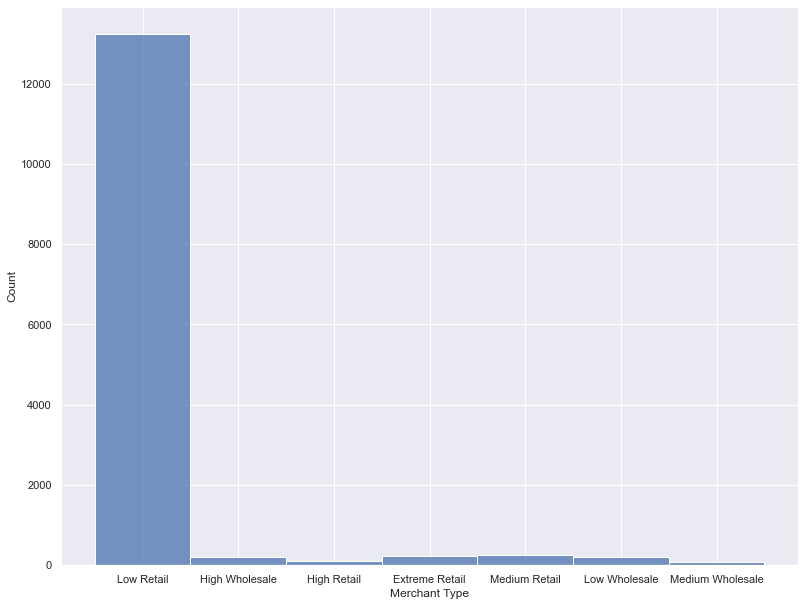

In [12]:
#Visualize information of each merchant category
sns.set(rc={'figure.figsize':(13.2,10.27)})
#sns.histplot(data=df_merchant_amount,x="Merchant Type")
sns.histplot(data=df_merchant_amount,x="Merchant Type")

In [14]:
print("""According to above analysis - Corresponding dataset has more "Low Retail" transactions""")

According to above analysis - Corresponding dataset has more "Low Retail" transactions
